In [1]:
import torch

from rqvae_data import get_data

df = get_data()

In [2]:
embs = torch.stack(df["embeddings"].tolist())

In [3]:
from rqvae import RQVAE

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


rqvae = RQVAE(
    input_dim=embs.shape[1],
    hidden_dim=128,
    beta=0.25,
    codebook_sizes=[256] * 4,
    should_init_codebooks=True,
    should_reinit_unused_clusters=False,
).to(device)


embs_dict = {"embedding": embs.to(device)}

rqvae.forward(embs_dict)

100%|██████████| 4/4 [00:07<00:00,  1.95s/it]


{'loss': tensor(0.0056, device='cuda:0', grad_fn=<MeanBackward0>),
 'recon_loss': tensor(0.0051, device='cuda:0'),
 'rqvae_loss': tensor(0.0005, device='cuda:0'),
 'unique/0': 256,
 'unique/1': 256,
 'unique/2': 256,
 'unique/3': 256}

In [15]:
from collisions import dedup
from rqvae_data import get_cb_tuples


cb_tuples = list(get_cb_tuples(rqvae, embs_dict["embedding"]))
items_with_tuples = list(zip(df["asin"], df["title"].fillna("unknown"), cb_tuples))
items_with_tuples = dedup(items_with_tuples)

In [5]:
from rqvae_data import search_similar_items


for i in range(100, 110):
    sim = search_similar_items(items_with_tuples, (i,), 10)
    if len(sim) == 0:
        continue
    print(i)
    for asin, item, clust_tuple in sim:
        print(f"{item=} {clust_tuple=}")

100
item='Simple Protecting Light Moisturizer Spf 15, 4.2 Ounce' clust_tuple=(100, 43, 110, 111, 20)
item="POND'S Dry Skin Cream, 10.1-oz. (Pack of 3)" clust_tuple=(100, 144, 110, 111, 0)
item='Kiss My Face Natural Mineral Lotion Sunscreen SPF 40 with Hydresia, 3 Fluid Ounce' clust_tuple=(100, 43, 110, 111, 16)
item="Pond's Luminous Moisture Day SPF 15 Lotion, 1.7 Ounce" clust_tuple=(100, 43, 101, 111, 6)
item='St. Ives Facial Moisturizer, Timeless Skin Collagen Elastin, 10oz' clust_tuple=(100, 43, 110, 121, 2)
item='Clarins Cleansing Milk - Oily to Combination Skin, 7-Ounces Box' clust_tuple=(100, 43, 15, 111, 0)
item="POND'S Rejuveness Anti-Wrinkle Cream, 7-oz." clust_tuple=(100, 43, 110, 111, 9)
item='Olay Total Effects Blemish Control Salicylic Acid Acne Cleanser 5.0 Fl Oz (Pack of 3)' clust_tuple=(100, 144, 110, 111, 1)
item='Hydroxatone 90 Second Wrinkle Reducer' clust_tuple=(100, 43, 110, 31, 0)
item='Collagen Essence Full Face Mask 10 Pieces' clust_tuple=(100, 144, 88, 111, 0)


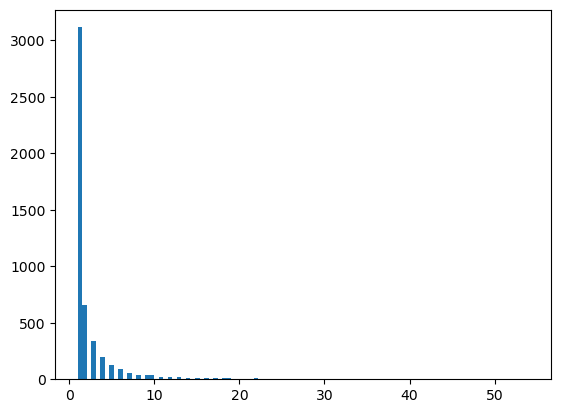

In [29]:
from collections import Counter
import matplotlib.pyplot as plt


plt.hist(Counter(item[-1][:-1] for item in items_with_tuples).values(), bins=100)
plt.show()

In [16]:
len(set(item[-1] for item in items_with_tuples))

12101